# Линейные графики и точечные диаграммы.

### Задание 1

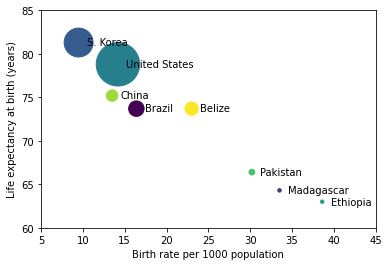

<Figure size 432x288 with 0 Axes>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
countries = ['Brazil', 'Madagascar', 'S. Korea', 'United States', 'Ethiopia', 'Pakistan', 'China', 'Belize']
#Уровень рождаемости на 1000 населения.
birth_rate = [16.4, 33.5, 9.5, 14.2, 38.6, 30.2, 13.5, 23.0]
#Ожидаемая средняя продолжительность жизни при рождении, в г. 
life_expectancy = [73.7, 64.3, 81.3, 78.8, 63.0, 66.4, 75.2, 73.7]
#Доход на душу населения, определенный в 2000 г. в долл. США. 
GDP = np.array([4800, 240, 16700, 37700, 230, 670, 2640, 3490])
fig, ax = plt.subplots()
offset = 1
for x, y, s, country in zip(birth_rate, life_expectancy, GDP, countries):
    ax.text(x+offset, y, country, va='center')

#Некоторые произвольно выбираемые цвета:
colors = range(len(countries))
ax.scatter(birth_rate, life_expectancy, c=colors , s=GDP/20) 
ax.set_xlim(5, 45)
ax.set_ylim(60, 85)
ax.set_xlabel('Birth rate per 1000 population') 
ax.set_ylabel('Life expectancy at birth (years)')
plt.show()
plt.draw()
fig.savefig("image.png",dpi=500)


### Задание 2

Reading data from file population_total.tsv
Reading data from file bmi_men.tsv
Reading data from file gdp.tsv
Reading data from file continents.tsv


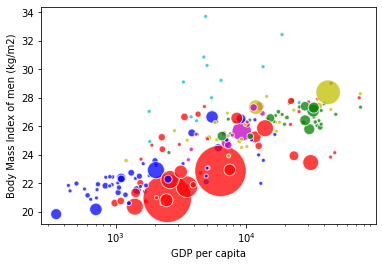

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def read_data(filename, data_type=float):
    """
    Read in data from filename from two-column, tab-separated format
    of country, value pairs. Cast the value to the data type specified
    by data_type and return it as values to a dictionary keyed by country.

    """

    print('Reading data from file {}'.format(filename))
    data = {}
    with open(filename, 'r') as fi:
        for line in fi.readlines():
            fields = line.split('\t')
            if len(fields) != 2:
                # No data for this country
                continue
            country, value = fields[0], fields[1].strip()
            if not value:
                # Blank data field for this country
                continue
            data[country] = data_type(value)
    return data

# Read in the raw data
raw_pop = read_data('population_total.tsv')
raw_bmi = read_data('bmi_men.tsv')
raw_gdp = read_data('gdp.tsv')
continent = read_data('continents.tsv', str)

# Get an alphabetically-sorted list of countries which have entries in all
# of the data sets just read in.
countries = set(raw_pop.keys()) & set(raw_bmi.keys()) & set(raw_gdp.keys())\
            & set(continent.keys())
countries = sorted(list(countries))

# Convert the dictionaries of data to numpy arrays
pop = np.array([raw_pop[country] for country in countries])
bmi = np.array([raw_bmi[country] for country in countries])
gdp = np.array([raw_gdp[country] for country in countries])

# Set the colours of the plotted bubbles by continent
continent_colours = {'Africa': 'b', 'Asia': 'r', 'North America': 'y',
                     'South America': 'm', 'Europe': 'g', 'Oceania': 'c'}
colours = [continent_colours[continent[country]] for country in countries]

# Set the bubble sizes (circle areas) by population, scaled to 2000 pts^2
# per billion people, but with a minimum size of 16 pts^2
sizes = np.clip(pop / 1.e9 * 2000, 16, None)

fig = plt.figure()
ax = fig.add_subplot(111)
sct = ax.scatter(gdp, bmi, s=sizes, c=colours, edgecolor='w')
# Make the bubbles a bit transparent: some large ones overlap smaller ones
sct.set_alpha(0.75)
# The countries' GDPs span several orders of magnitude so a log-scale
# is appropriate.
ax.set_xscale('log')

ax.set_xlabel('GDP per capita')
ax.set_ylabel('Body Mass Index of men (kg/m2)')

plt.show()